# 使用梯度上升法求解主成分

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75*X[:, 0] + 3. + np.random.normal(0, 10., size=100)

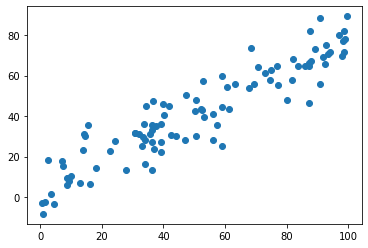

In [38]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

---
## 降维

### 1. demean

In [39]:
def demean(X):
    return X - np.mean(X, axis=0) # 1*n 的向量

In [40]:
X_demean = demean(X)

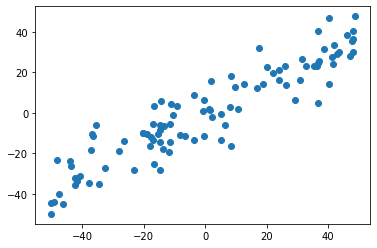

In [41]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [42]:
np.mean(X_demean[:, 0])

6.252776074688882e-15

In [43]:
np.mean(X_demean[:, 1])

-2.6858515411731786e-14

### 2. 梯度上升法

In [44]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [45]:
def df_math(w, x):
    return X.T.dot(X.dot(w))*2. / len(X)

In [46]:
def df_debeg(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [47]:
def direction(w):
    # 成为单位方向
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter=0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) #单位方向向量
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
        
    return w

In [48]:
initial_w = np.random.random(X.shape[1])  # 不能为0
initial_w

array([0.77318151, 0.82656601])

In [49]:
eta = 0.001

In [50]:
# 注意3：不能使用StandardScaler的标准化

In [57]:
e = gradient_ascent(df_debeg, X_demean, initial_w, eta=eta)

In [58]:
w = gradient_ascent(df_math, X_demean, initial_w, eta=eta)

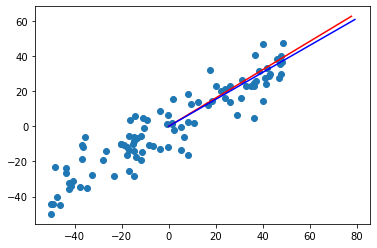

In [59]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*100], [0, w[1]*100], 'r')
plt.plot([0, e[0]*100], [0, e[1]*100], 'b')
plt.show()

In [63]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75*X2[:, 0] + 3. 

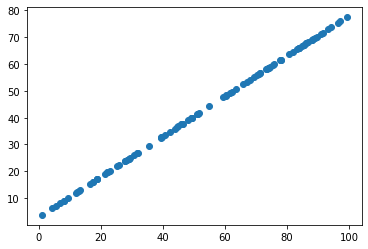

In [64]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [65]:
X2=demean(X2)
w = gradient_ascent(df_math, X2, initial_w, eta=eta)

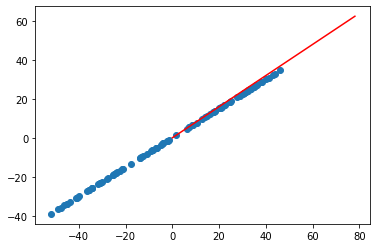

In [67]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.plot([0, w[0]*100], [0, w[1]*100], 'r')
plt.show()

In [68]:
gradient_ascent(df_math, X2, initial_w, eta=eta)

array([0.78131655, 0.62413496])